# Proyecto Final Procesamiento Digital de Señales.

Elaborado por: Jose David Ortiz Miranda

Ingenieria de Telecomumicaciones

Universidad de Antioquia

In [1]:
## Librerias importantes
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from scipy.io import wavfile
from scipy.signal import hilbert
from IPython.display import Audio # para escuchar la senal
from IPython.display import Audio #Libreria para escuchar audio

## 1.1 Aplicación de la Transformada de Fourier a señales de audio industriales.

### Respuesta a la Pregunta 1.

### Palabras claves:
#### Transformada de Fourier, vibraciones, amplitud, tiempo, frecuencia


### Primero se importan los audios para su analisis.

### - Audio 1.

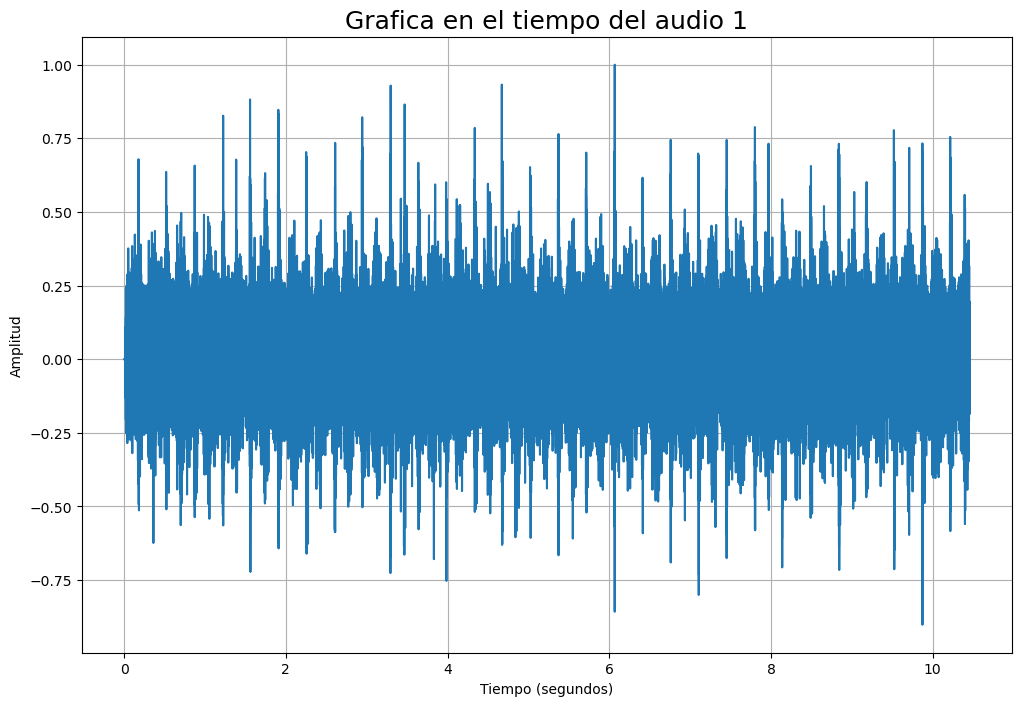

La frecuencia de este caso es:  8000


In [2]:
file_audio_1=('prensa_industrial.wav') # Ruta del archivo con la senal
fs, y=read(file_audio_1) # Cargar el archivo
y = y / np.max(np.abs(y)) # escala la amplitud de la senal
t=np.arange(0, float(len(y))/fs, 1.0/fs) # Vector de tiempo
plt.figure(figsize=(12,8))
plt.plot(t,y) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio 1",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(y, rate=fs) # para escuchar la senal

### Respuesta a la pregunta 2 para el audio 1.

Para este caso no se nota que la señal sea periodica, pero se puede decir que tiene una cuasi-periodicidad porque algunos picos de amplitud son repetidos por cierto tiempo, tal vez, si el audio se siguera reproduciendo por un tiempo mas prolongado entonces si se podria decir que tiene un compotamiento periodico.

### - Audio 2.

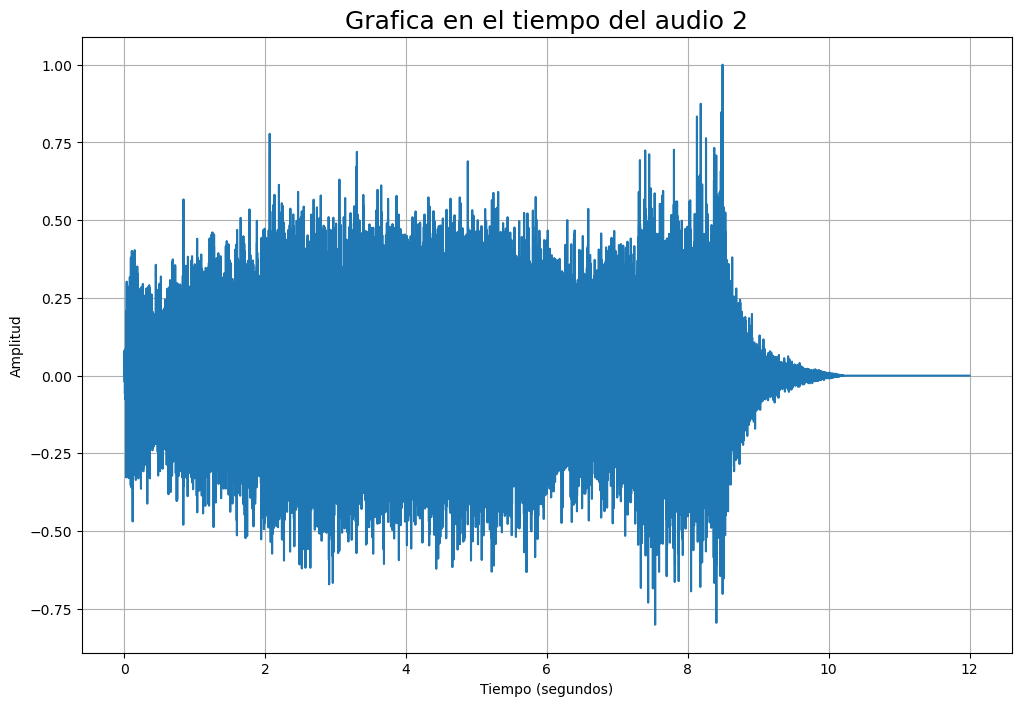

La frecuencia de este caso es:  8000


In [3]:
file_audio_2=('taladro.wav') # Ruta del archivo con la senal
fs, x=read(file_audio_2) # Cargar el archivo
x = x / np.max(np.abs(x)) # escala la amplitud de la senal
t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo
plt.figure(figsize=(12,8))
plt.plot(t,x) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio 2",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(x, rate=fs) # para escuchar la senal

### Respuesta a la pregunta 2 para el audio 2.

Para este audio no se ve una periodicidad marcada por lo tanto se puede decir que no es periodica, ademas la intensidad del sonido va aumentando, eso se puede ver refleajado en la cantidad de picos que tiene la señal en el eje de amplitud.

### - Audio 3.

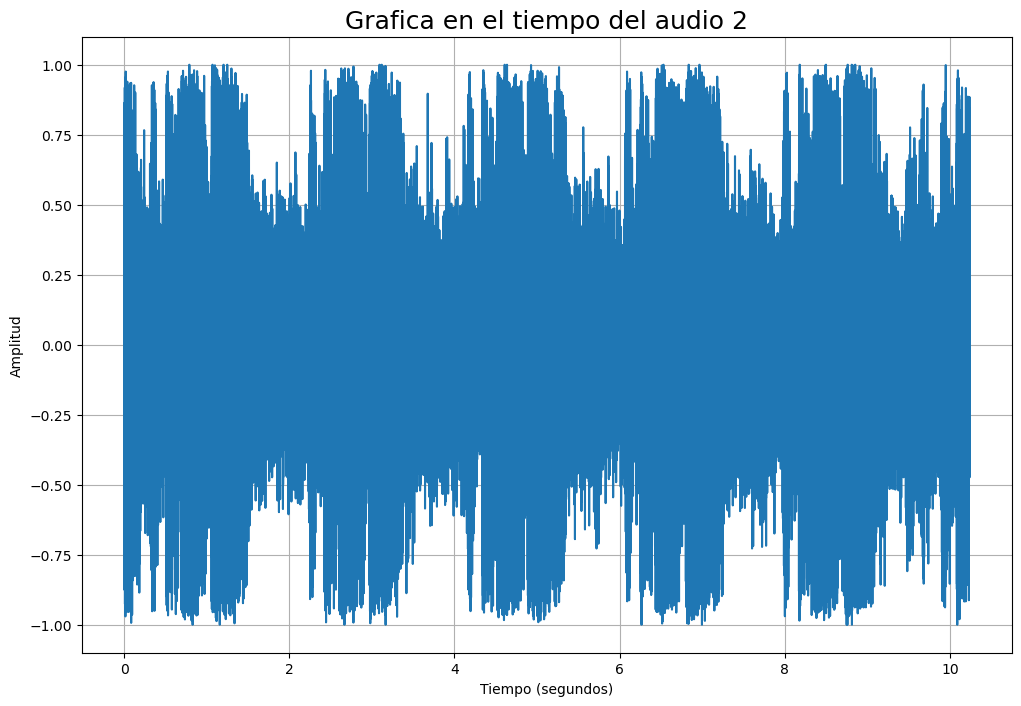

La frecuencia de este caso es:  8000


In [4]:
file_audio_3=('ambiente_fabrica.wav') # Ruta del archivo con la senal
fs, z=read(file_audio_3) # Cargar el archivo
z = z / np.max(np.abs(z)) # escala la amplitud de la senal
t=np.arange(0, float(len(z))/fs, 1.0/fs) # Vector de tiempo
plt.figure(figsize=(12,8))
plt.plot(t,z) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio 2",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(z, rate=fs) # para escuchar la senal

### Respuesta a la pregunta 2 para el audio 3.

En este audio si se ve una tendencia periodica marcada del segundo 0 a 5, se puede observar que se hacen tres ciclos completos de periodo, se puede aproximar que cada periodo esta durando 1.7 segundos aproximadamente puesto que la grafica no es muy clara con las particiones de los segundos, sin embargo si se ve una periodicidad que se hace evidente solo con la grafica.

### Aplicación de la FFT para los audios.

In [5]:
### Primero definamos la funcion
def dftmatrix(N, Nfft):
#construct DFT matrix
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None]))
    return U/np.sqrt(Nfft)

### Aplicacion de la FFT para el audio 1.

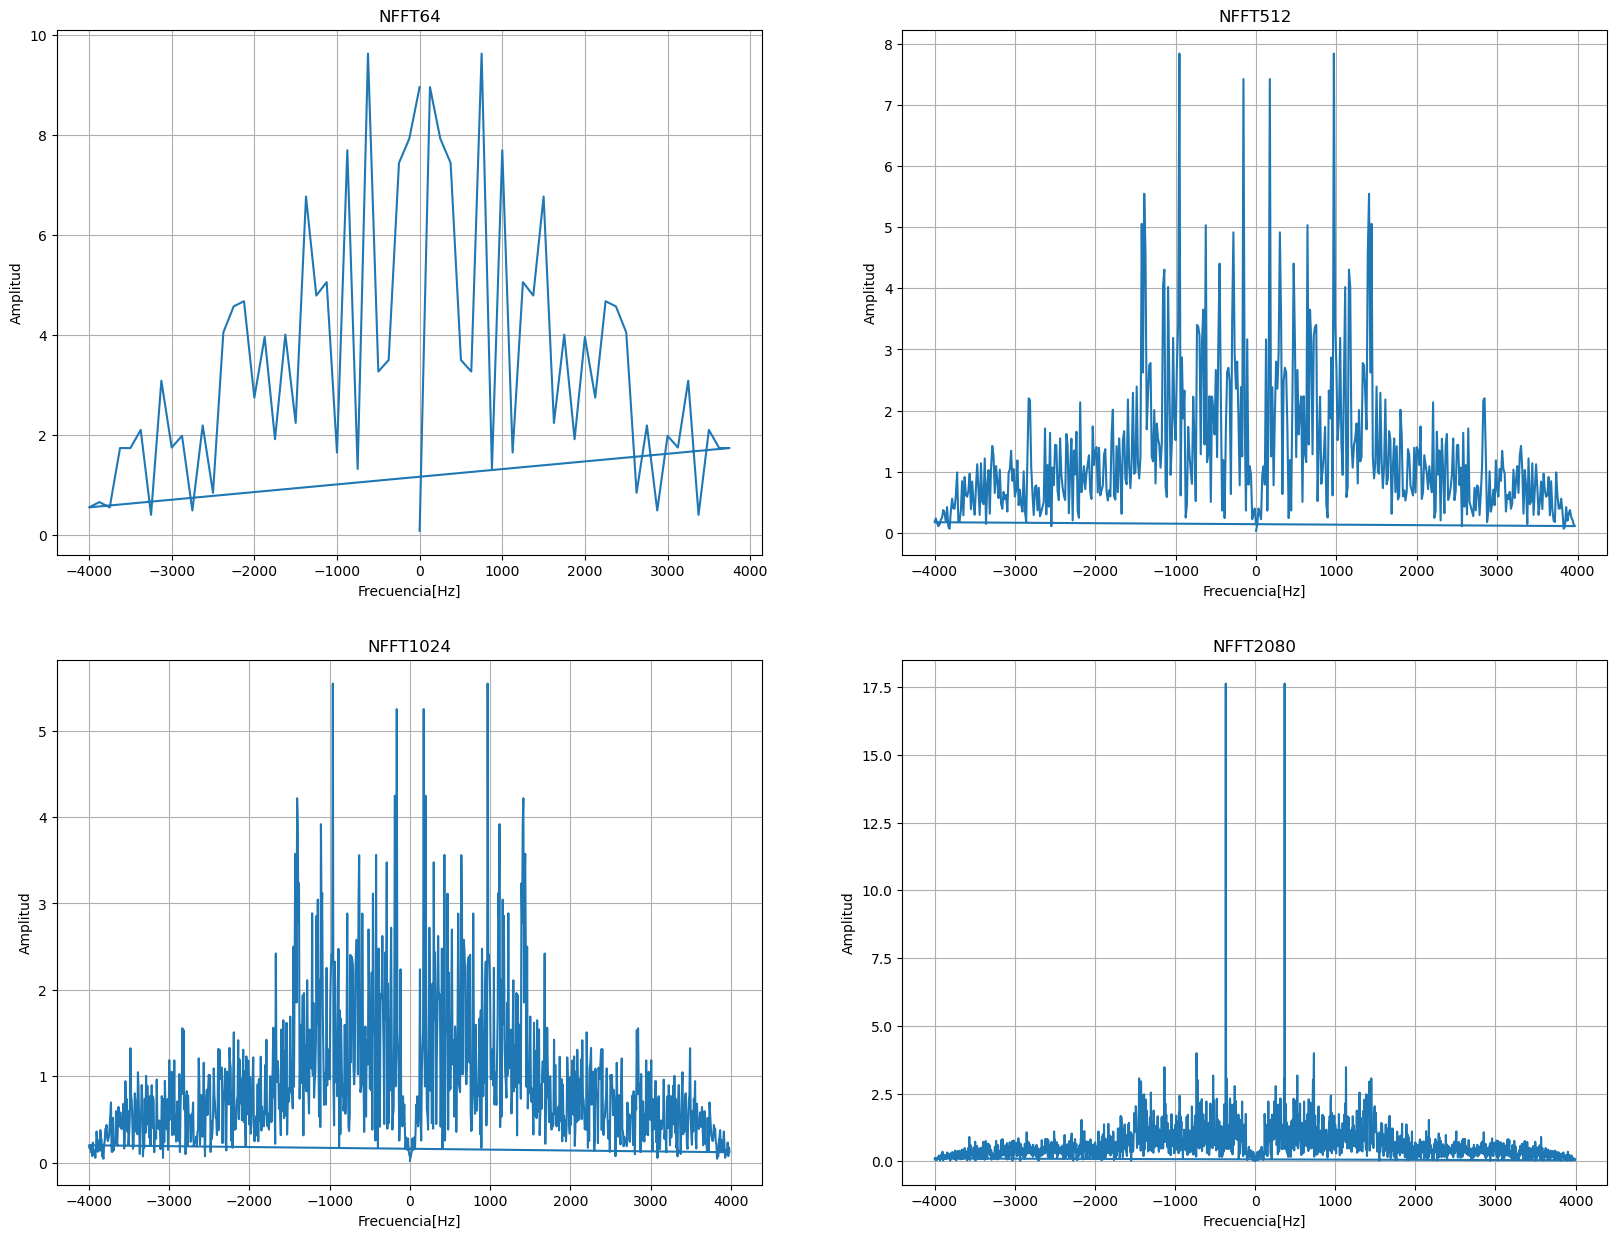

In [6]:
y.shape=(len(y),1) # Convierto en vector columna para poder multiplicar con la matriz

nfft=[64,512,1024,2080] #reconstruccion numero de puntos
DTFS=[] #Almacena la transformada en cada caso 

plt.figure(figsize=(20,15))
for i in range (len(nfft)):
    U = dftmatrix(len(y), nfft[i]) # Calculo la matriz de transformacion
    Xf=U.H*y[:]# Calculo la fft transfromada de fourier
    Xf=np.array(Xf)
    DTFS.append(Xf)
    freq=(np.hstack((np.arange(0, nfft[i]/2-1), np.arange(-nfft[i]/2, 1))))*fs/nfft[i]
    plt.subplot(2,2,i+1)
    plt.plot(freq,np.abs(Xf))
    plt.grid();plt.xlabel("Frecuencia[Hz]");plt.ylabel("Amplitud");
    plt.title("NFFT"+str(nfft[i]))
plt.show()

### Respuesta de la Pregunta 3 para el audio 1.

RESPUESTAAAA

### Aplicacion de la FFT para el audio 2.

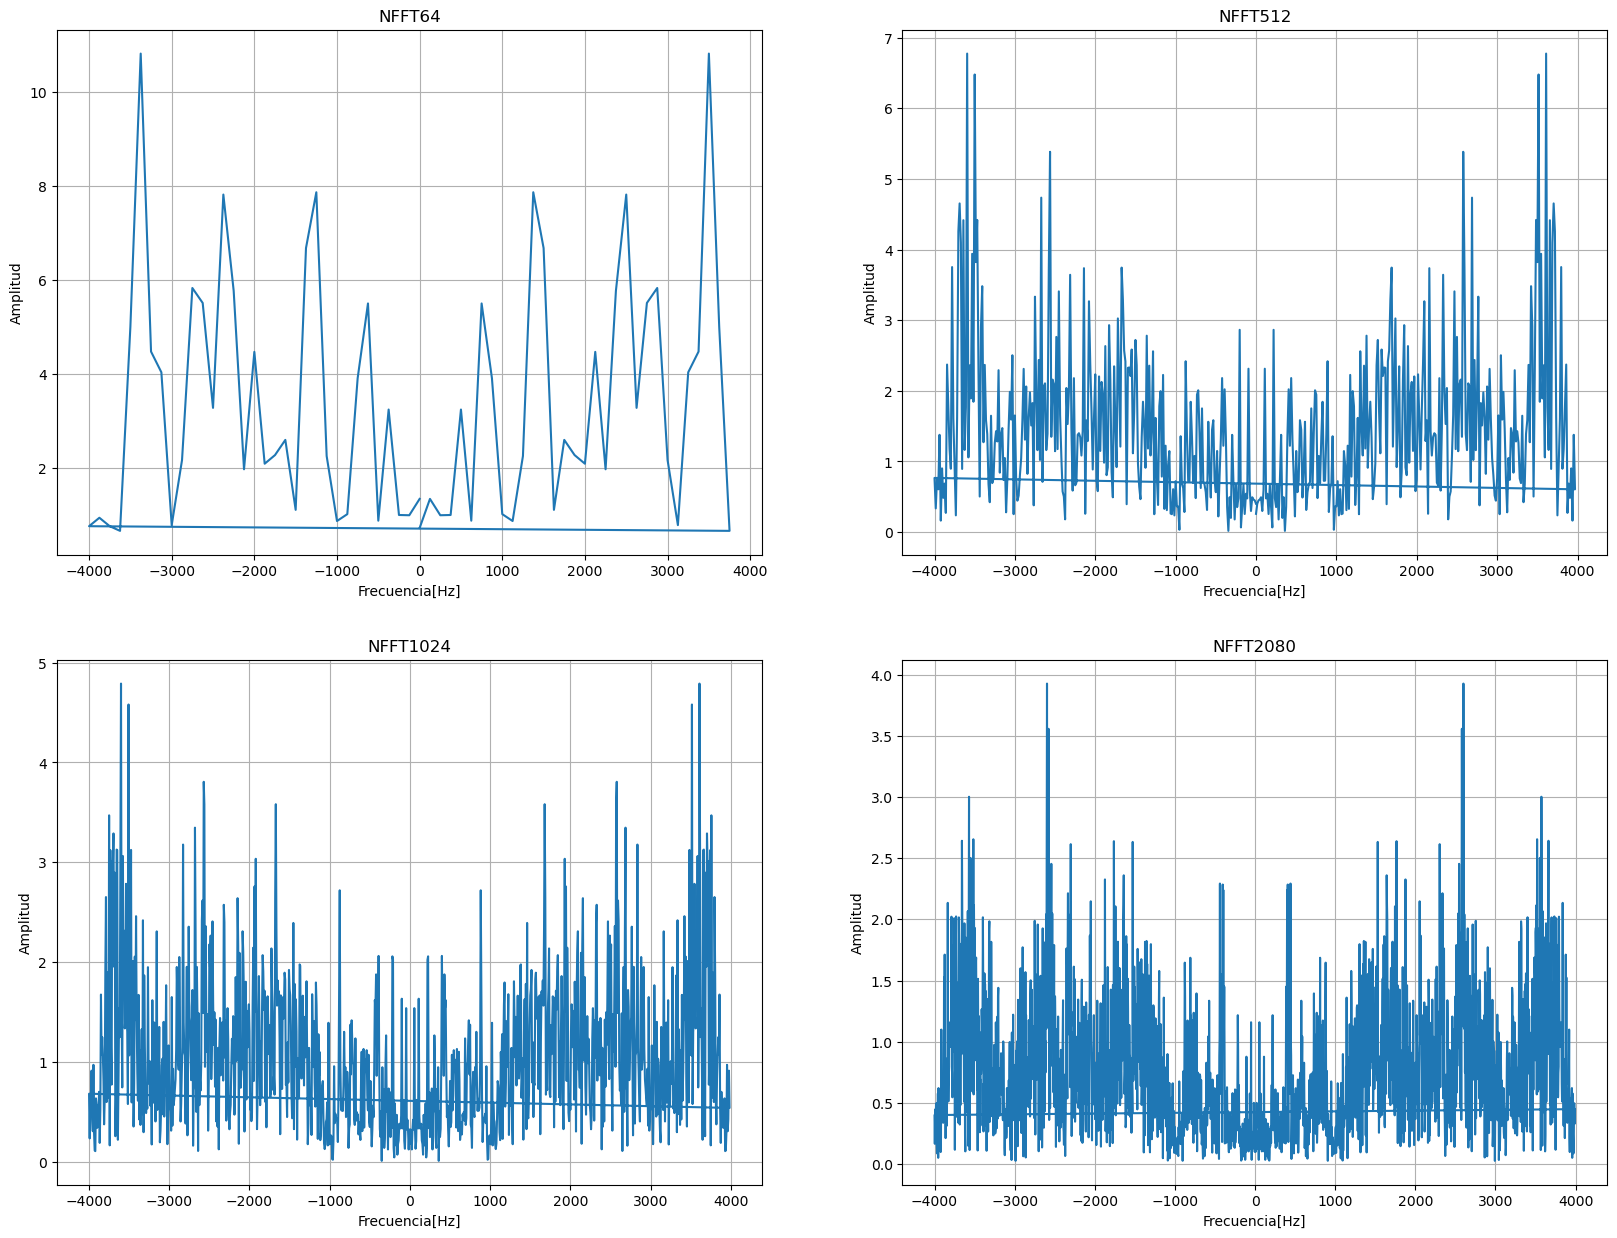

In [7]:
x.shape=(len(x),1) # Convierto en vector columna para poder multiplicar con la matriz

nfft=[64,512,1024,2080] #reconstruccion numero de puntos
DTFS=[] #Almacena la transformada en cada caso 

plt.figure(figsize=(20,15))
for i in range (len(nfft)):
    U = dftmatrix(len(x), nfft[i]) # Calculo la matriz de transformacion
    Xf=U.H*x[:]# Calculo la fft transfromada de fourier
    Xf=np.array(Xf)
    DTFS.append(Xf)
    freq=(np.hstack((np.arange(0, nfft[i]/2-1), np.arange(-nfft[i]/2, 1))))*fs/nfft[i]
    plt.subplot(2,2,i+1)
    plt.plot(freq,np.abs(Xf))
    plt.grid();plt.xlabel("Frecuencia[Hz]");plt.ylabel("Amplitud");
    plt.title("NFFT"+str(nfft[i]))
plt.show()

### Respuesta de la Pregunta 3 para el audio 2.

RESPUESTAAAA

### Aplicacion de la FFT para el audio 3.

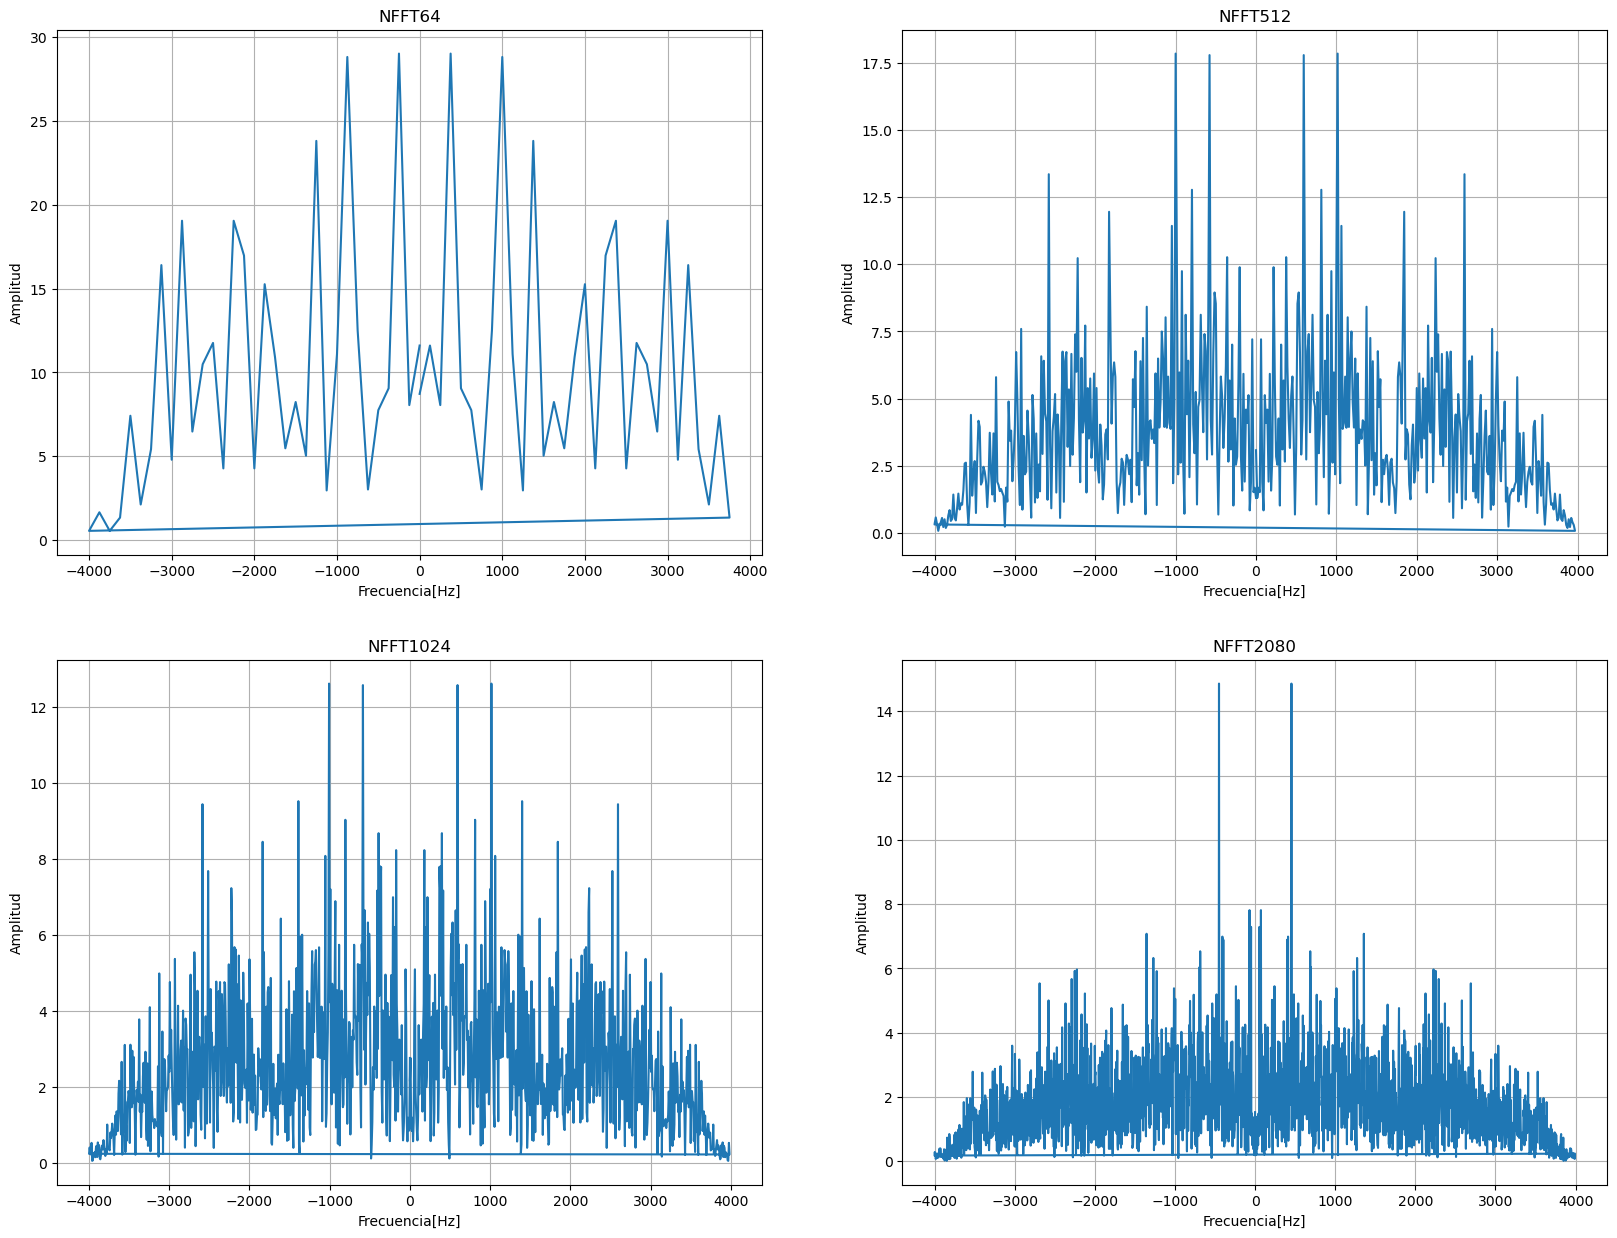

In [8]:
z.shape=(len(z),1) # Convierto en vector columna para poder multiplicar con la matriz

nfft=[64,512,1024,2080] #reconstruccion numero de puntos
DTFS=[] #Almacena la transformada en cada caso 

plt.figure(figsize=(20,15))
for i in range (len(nfft)):
    U = dftmatrix(len(z), nfft[i]) # Calculo la matriz de transformacion
    Xf=U.H*z[:]# Calculo la fft transfromada de fourier
    Xf=np.array(Xf)
    DTFS.append(Xf)
    freq=(np.hstack((np.arange(0, nfft[i]/2-1), np.arange(-nfft[i]/2, 1))))*fs/nfft[i]
    plt.subplot(2,2,i+1)
    plt.plot(freq,np.abs(Xf))
    plt.grid();plt.xlabel("Frecuencia[Hz]");plt.ylabel("Amplitud");
    plt.title("NFFT"+str(nfft[i]))
plt.show()

### Respuesta de la Pregunta 3 para el audio 3.

RESPUESTAAAA